In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target==2)

svm_clf = make_pipeline(StandardScaler(), 
                        LinearSVC(C=1, random_state=42))
svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [3]:
X_new = [[5.5, 2.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [4]:
svm_clf.decision_function(X_new)

array([ 2.90887886, -0.22036063])

In [5]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10000, random_state=42)
)
polynomial_svm_clf.fit(X, y)
polynomial_svm_clf['linearsvc'].coef_

array([[ 0.        , -0.90253479, -0.3728471 , -4.19321923, -0.49846487,
         0.68212693,  6.58255005, -0.50824401,  0.77497688, -2.14418599]])

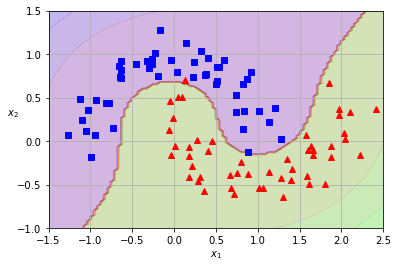

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r^')
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s,x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0,x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

axes = [-1.5, 2.5, -1, 1.5]
plot_predictions(polynomial_svm_clf, axes)
plot_dataset(X, y, axes)



In [7]:
from sklearn.svm import SVC

poly_kernal_svc_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=5)
)
poly_kernal_svc_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

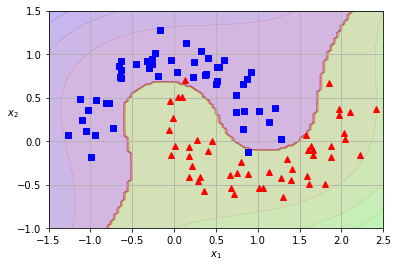

In [8]:
plot_predictions(poly_kernal_svc_clf, axes)
plot_dataset(X,y,axes)

In [9]:
# With Gaussian RBF Kernal

rbf_kernal_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", gamma=5, C=0.001)
)

rbf_kernal_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

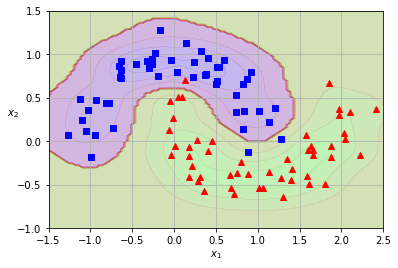

In [10]:
plot_dataset(X, y, axes)
plot_predictions(rbf_kernal_svm_clf, axes)

In [11]:
iris = load_iris(as_frame=True)
print(iris.target.unique(), iris.target_names)

X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)

X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
print(X[:5])

[0 1 2] ['setosa' 'versicolor' 'virginica']
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


In [12]:
from sklearn.linear_model import SGDClassifier

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linear_svc_clf = LinearSVC(loss='hinge', C=10, random_state=42).fit(X_scaled, y)
svc_clf = SVC(kernel='linear', C=10).fit(X_scaled, y)
sgd_clf = SGDClassifier(loss='hinge', alpha=0.05).fit(X_scaled, y)


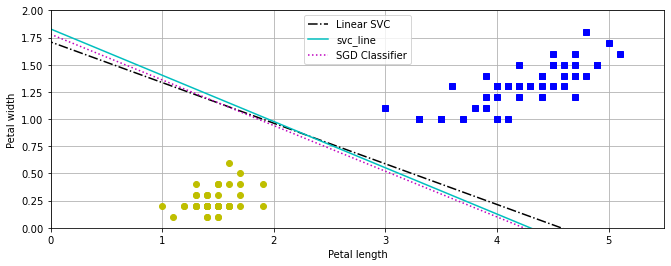

In [13]:
def decision_boundary(model):
    w = -model.coef_[0,0] / model.coef_[0,1]
    b = -model.intercept_ / model.coef_[0,1]
    return scaler.inverse_transform([[-5,-5*w + b], [5, 5*w + b]])

linear_svc_line = decision_boundary(linear_svc_clf)
svc_line = decision_boundary(svc_clf)
sgd_clf_line = decision_boundary(sgd_clf)

plt.figure(figsize=(11, 4))
plt.plot(linear_svc_line[:, 0], linear_svc_line[:, 1], 'k-.', label='Linear SVC')
plt.plot(svc_line[:,0], svc_line[:,1], 'c-', label='svc_line')
plt.plot(sgd_clf_line[:,0], sgd_clf_line[:,1], 'm:', label="SGD Classifier")
plt.plot(X[:,0][y==1], X[:,1][y==1], "bs")
plt.plot(X[:,0][y==0], X[:,1][y==0], "yo")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis([0, 5.5, 0, 2])
plt.grid()
plt.show()

In [21]:
from sklearn.datasets import load_wine

wine_data = load_wine(as_frame=True)
print(wine_data.DESCR)
print(wine_data.feature_names)
print(wine_data.target_names)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = wine_data.data
y = wine_data.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [29]:
linear_svc_clf = make_pipeline(
    StandardScaler(),
    LinearSVC(random_state=42),
)

In [34]:
cross_val_score(linear_svc_clf, X_train, y_train, cv=5).mean()

0.9716748768472907

In [ ]:
svc_clf = make_pipeline(
    StandardScaler(),
    SVC(random_state=42),
)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=42))])

In [ ]:
cross_val_score(svc_clf, X_train, y_train).mean()

0.993103448275862

In [43]:
from scipy.stats import reciprocal, uniform
from sklearn.model_selection import RandomizedSearchCV

params = {
    "svc__gamma": reciprocal(0.001, 0.1),
    "svc__C": uniform(1,10)
}

rnd_search_cv = RandomizedSearchCV(svc_clf, param_distributions=params, n_iter=100, cv=5, random_state=42)
rnd_search_cv.fit(X_train, y_train) 
print(rnd_search_cv.best_estimator_)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=4.745401188473625, gamma=0.07969454818643928,
                     random_state=42))])


In [45]:
print(rnd_search_cv.best_score_)
print(rnd_search_cv.score(X_test, y_test))

0.9862068965517242
0.9722222222222222


In [46]:
from sklearn.datasets import fetch_california_housing

house_data = fetch_california_housing(as_frame=True)

In [52]:
print(dir(house_data))
X_train, X_test, y_train, y_test = train_test_split(house_data.data, house_data.target, test_size=0.2)
X_train.head()

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17701,5.0225,16.0,5.332481,1.007673,1705.0,4.360614,37.29,-121.82
14226,3.2174,15.0,7.370968,1.447581,955.0,3.850806,32.68,-117.05
6667,3.4811,44.0,5.011123,0.994438,2296.0,2.553949,34.17,-118.10
15658,1.8068,52.0,2.659864,1.206025,1761.0,1.711370,37.79,-122.42
16555,3.1429,36.0,6.042553,1.127660,130.0,2.765957,37.81,-121.31


In [61]:
from sklearn.svm import LinearSVR, SVR
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(y_pred, y_actual):
    mse = mean_squared_error(y_actual, y_pred)
    rmse = np.sqrt(mse)
    return rmse

lin_svr = make_pipeline(
    StandardScaler(),
    LinearSVR(random_state=42, max_iter=1_000_000)
)
lin_svr.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(max_iter=1000000, random_state=42))])

In [62]:
y_pred = lin_svr.predict(X_test)
rmse(y_pred, y_test)

1.1061967142198923

In [64]:
rbf_kernal_svr = make_pipeline(
    StandardScaler(),
    SVR(kernel='rbf')
)

rbf_kernal_svr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [66]:
y_pred = rbf_kernal_svr.predict(X_test)
rmse(y_pred, y_test)

0.5998073341784144

In [69]:
# tuning

params = {
    'svr__gamma': reciprocal(0.001, 0.1),
    'svr__C': uniform(1,10)
}

rnd_search_cv = RandomizedSearchCV(rbf_kernal_svr, param_distributions=params, n_iter=100, cv=5, random_state=42)
rnd_search_cv.fit(X_train[:2000], y_train[:2000])

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR())]),
                   n_iter=100,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001605EA9DEE0>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001605E8C6430>},
                   random_state=42)

In [70]:
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=4.63629602379294, gamma=0.08781408196485974))])

In [73]:
-cross_val_score(rnd_search_cv.best_estimator_, X_train, y_train,
                 scoring="neg_root_mean_squared_error")

array([0.5813802 , 0.54744928, 0.59145209, 0.58673624, 0.5897845 ])

In [72]:
y_pred = rnd_search_cv.predict(X_test)
rmse(y_pred, y_test)

0.5915503480140372